# 0. neural network

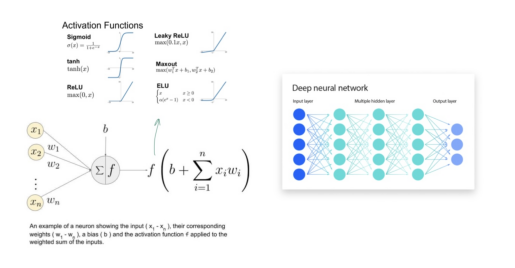

In [67]:
import matplotlib.pyplot as plt 
import matplotlib.image as img 
  
# reading the image 
testImage = img.imread('/Users/sirasittanrattanawong/Downloads/Fundamental_AI_Tutorial/AI_Tutorial_Fundamental/basic_ML_and_Deeplearning/Basic_Knowledge/image/neural_network.jpg') 

plt.axis('off')  # command for hiding the axis. 

# displaying the image 
plt.imshow(testImage) 

In [68]:
print(type(testImage))
print(testImage.shape)

<class 'numpy.ndarray'>
(670, 1337, 3)


# 1. data

## 1.0 create circle

In [69]:
from sklearn.datasets import make_circles 

X : array of shape [n_samples, 2]

The generated samples.

y : array of shape [n_samples]

The integer labels (0 or 1) for class membership of each sample.

In [70]:
#make 1000 samples
n_samples = 1000

#create circles
X, y = make_circles(n_samples,noise=0.03, random_state=42)

In [71]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [72]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2" : X[:, 1],
                        "label": y
                        })
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [73]:
print(circles.label.value_counts())

label
1    500
0    500
Name: count, dtype: int64


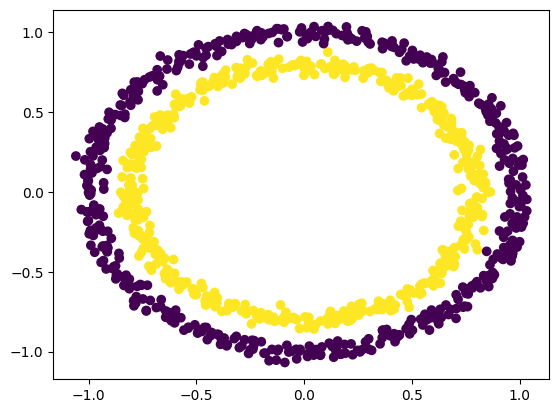

In [74]:
#visualize
import matplotlib.pyplot as plt
plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c = y,
            cmap = None);

## 1.1 input and output shapes

In [75]:
X.shape, y.shape

((1000, 2), (1000,))

In [76]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


## 1.2 turn data into tensors and create train test split

In [77]:
import numpy as np
import torch

In [78]:
old_X = X
old_y = y

In [79]:
#a = np.array([1, 2, 3])
#t = torch.from_numpy(a)
#t -> tensor([1, 2, 3])
X = torch.from_numpy(old_X)
y = torch.from_numpy(old_y)


In [80]:
print(X[:5])
print()

print(y[:5])

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]], dtype=torch.float64)

tensor([1, 1, 1, 1, 0])


In [81]:
#split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

# 2. model

## 2.0 building the model

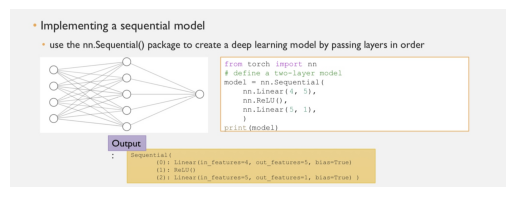

In [82]:
import matplotlib.pyplot as plt 
import matplotlib.image as img 
  
# reading the image 
testImage = img.imread('/Users/sirasittanrattanawong/Downloads/Fundamental_AI_Tutorial/AI_Tutorial_Fundamental/basic_ML_and_Deeplearning/Basic_Knowledge/image/neural_network2.jpg') 

plt.axis('off')  # command for hiding the axis. 

# displaying the image 
plt.imshow(testImage) 

observation : in_features, out_features

In [83]:
import torch
from torch import nn

#Make device agnostic
device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.has_mps else 'cpu')
device

device(type='mps')

let's create a model class

(circle prediction)
input data is (2, ) out put is () (yes,no)

In [84]:
class CircleModelV0(nn.Module) :
    def __init__(self) :
        super().__init__()
        #create 2 nn.Linear layers capable of handling X and y
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
        
    def forward(self, x) :
        return self.layer_2(self.layer_1(x))
    
model_0 = CircleModelV0().to(device)
model_0
        

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

    The only major change is what's happening between self.layer_1 and self.layer_2

self.layer_1 takes 2 input features in_features=2 and produces 5 output features out_features=5.

This is known as having 5 hidden units or neurons.

This layer turns the input data from having 2 features to 5 features.



    Why do this?

This allows the model to learn patterns from 5 numbers rather than just 2 numbers, potentially leading to better outputs.

I say potentially because sometimes it doesn't work.

The number of hidden units you can use in neural network layers is a hyperparameter (a value you can set yourself) and there's no set in stone value you have to use.

Generally more is better but there's also such a thing as too much. The amount you choose will depend on your model type and dataset you're working with.

Since our dataset is small and simple, we'll keep it small.

    nn.ReLU() -> activation function

    nn.sequential() -> https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html

In [85]:
model_0 = nn.Sequential(nn.Linear(in_features=2, out_features=10),              #in_features = 2 from co-ordinate (x,y) of the circle
                        nn.ReLU(),
                        nn.Linear(in_features=10, out_features=10),
                        nn.ReLU(),
                        nn.Linear(in_features=10, out_features=10),
                        nn.ReLU(),
                        nn.Linear(in_features=10, out_features=10),
                        nn.ReLU(),
                        nn.Linear(in_features=10, out_features=1)).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=10, bias=True)
  (5): ReLU()
  (6): Linear(in_features=10, out_features=10, bias=True)
  (7): ReLU()
  (8): Linear(in_features=10, out_features=1, bias=True)
)

    Woah, that looks much simpler than subclassing nn.Module, why not just always use nn.Sequential?

nn.Sequential is fantastic for straight-forward computations, however, as the namespace says, it always runs in sequential order.

So if you'd something else to happen (rather than just straight-forward sequential computation) you'll want to define your own custom nn.Module subclass.

Now we've got a model, let's see what happens when we pass some data through it.

In [86]:


old_X_test = X_test
old_y_test = y_test

In [87]:
print(X_test.dtype)
print(y.dtype)



torch.float64
torch.int64


In [88]:
X_test = X_test.type(torch.float32) 

# we need to type cast because of this error from below code. 
# Cannot convert a MPS Tensor to float64 dtype as the MPS framework doesn't support float64. Please use float32 instead.

In [89]:
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.1643],
        [-0.1658],
        [-0.1703],
        [-0.1647],
        [-0.1722],
        [-0.1729],
        [-0.1797],
        [-0.1792],
        [-0.1702],
        [-0.1660]], device='mps:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])


## 2.1 setup loss function and optimizer

detail of loss and optimizer

In [90]:
loss_fn = nn.BCEWithLogitsLoss() # BCELoss = no sigmoid built-in

optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.01)

detail of evaluation metric

In [91]:
def accuracy_fn_wrong(y_true, y_pred) :
    correct = torch.eq(y_true, y_pred).sum().item()
    print(correct)
    acc = (correct/len(y_pred))*100

    return acc

In [92]:
def accuracy_fn(y_true, y_pred):
    y_true_squeezed = y_true.squeeze()  # Remove singleton dimensions, if any
    y_pred_squeezed = y_pred.squeeze()  # Remove singleton dimensions, if any

    if len(y_true_squeezed) != len(y_pred_squeezed):
        raise ValueError("Length of y_true and y_pred must be the same.")

    correct = torch.eq(y_true_squeezed, y_pred_squeezed).sum().item()
    #print("Number of correct predictions:", correct)
    
    acc = (correct / len(y_pred_squeezed)) * 100

    return acc


# 3. train the model

1. Forward pass - The model goes through all of the training data once, performing its  forward() function calculations (model(x_train)).
2. Calculate the loss - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).
3. Zero gradients - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (optimizer.zero_grad()).
4. Perform backpropagation on the loss - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (loss.backward()).
5. Step the optimizer (gradient descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).

## 3.1 going from raw model (unpretrained)

In [93]:
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1643],
        [-0.1658],
        [-0.1703],
        [-0.1647],
        [-0.1722]], device='mps:0', grad_fn=<SliceBackward0>)

from above we havent train model yet just random

In [94]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4590],
        [0.4586],
        [0.4575],
        [0.4589],
        [0.4571]], device='mps:0', grad_fn=<SigmoidBackward0>)

    to turn our prediction probabilities in prediction labels, we can round the output of sigmoid activation function.

recheck the syntax below We want 
If y_pred_probs >= 0.5, y=1 (class 1)
If y_pred_probs < 0.5, y=0 (class 0)

but what is the syntax it use

In [95]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='mps:0')


tensor([0., 0., 0., 0., 0.], device='mps:0', grad_fn=<SqueezeBackward0>)

In [96]:
y_test[:5]

tensor([1, 0, 1, 0, 1])

In [97]:
print(y_preds.device)
print(y_test.device)
print(y_preds.dtype)
print(y_test.dtype)

mps:0
cpu
torch.float32
torch.int64


In [98]:
y_test = y_test.to(device)
y_test = y_test.type(torch.float32)


In [99]:
print(y_preds.device)
print(y_test.device)
print(y_preds.dtype)
print(y_test.dtype)

mps:0
mps:0
torch.float32
torch.float32


In [100]:
print(accuracy_fn_wrong(y_test[:5], y_preds))
print()

print(torch.eq(y_test[:5], y_preds))
print()

print(y_preds)
print(y_test[:5])

10
200.0

tensor([[False,  True, False,  True, False],
        [False,  True, False,  True, False],
        [False,  True, False,  True, False],
        [False,  True, False,  True, False],
        [False,  True, False,  True, False]], device='mps:0')

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='mps:0', grad_fn=<RoundBackward0>)
tensor([1., 0., 1., 0., 1.], device='mps:0')


Ah, I see what's happening. It looks like the tensors are being broadcasted during the comparison. In PyTorch, if the shapes of two tensors are "broadcastable," then element-wise operations (like equality, addition, etc.) are performed as if the smaller tensor has been expanded to match the shape of the larger tensor.

In your example, y_test[:5] is of shape (5,), and y_preds is of shape (5, 1). PyTorch is broadcasting them to a common shape of (5, 5) during the comparison.

The resulting tensor from torch.eq(y_test[:5], y_preds) shows that each row of y_preds is being compared with y_test[:5], giving you a (5, 5) tensor filled with True and False values.

The .sum().item() then sums up all the True values in this (5, 5) tensor, which is why you get 15 (3 * 5 = 15). Each row in the resulting tensor has 3 True values, and there are 5 such rows.

In [101]:
print(accuracy_fn(y_test[:5], y_preds))
print()

print(torch.eq(y_test[:5], y_preds))
print()

print(y_preds)
print(y_test[:5])

40.0

tensor([[False,  True, False,  True, False],
        [False,  True, False,  True, False],
        [False,  True, False,  True, False],
        [False,  True, False,  True, False],
        [False,  True, False,  True, False]], device='mps:0')

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='mps:0', grad_fn=<RoundBackward0>)
tensor([1., 0., 1., 0., 1.], device='mps:0')


## 3.2 building a training and testing loop

In [102]:
len(X_test)

200

In [103]:
torch.manual_seed(42)

#set the number of epochs
epochs = 100


X_train = X_train.type(torch.float32)
y_train = y_train.type(torch.float32)
X_test = X_test.type(torch.float32)
y_test = y_test.type(torch.float32)

#put the data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)




#build training and evaluating loop
for epoch in range(epochs) :
    
    ### training
    model_0.train()
    
    #1. forward pass
    y_logits = model_0(X_train).squeeze() #squeeze to remove extra 1 dim
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    #2. calculate the loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true = y_train, y_pred = y_pred)
    
    #3. optimizer
    optimizer.zero_grad()
    
    #4. loss backward
    loss.backward()
    
    #5. optimizer step
    optimizer.step()
    
    #testing
    model_0.eval()
    with torch.inference_mode() :
        #1. forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        #2. calculate loss/accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)
        
    if(epoch % 10 == 0) :
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.5f}")

Epoch: 0 | Loss: 0.69667, Accuracy: 50.00% | Test loss: 0.69667, Test acc: 50.00000
Epoch: 10 | Loss: 0.69641, Accuracy: 50.00% | Test loss: 0.69641, Test acc: 50.00000
Epoch: 20 | Loss: 0.69618, Accuracy: 50.00% | Test loss: 0.69617, Test acc: 50.00000
Epoch: 30 | Loss: 0.69596, Accuracy: 50.00% | Test loss: 0.69595, Test acc: 50.00000
Epoch: 40 | Loss: 0.69575, Accuracy: 50.00% | Test loss: 0.69575, Test acc: 50.00000
Epoch: 50 | Loss: 0.69557, Accuracy: 50.00% | Test loss: 0.69556, Test acc: 50.00000
Epoch: 60 | Loss: 0.69540, Accuracy: 50.00% | Test loss: 0.69539, Test acc: 50.00000
Epoch: 70 | Loss: 0.69523, Accuracy: 50.00% | Test loss: 0.69522, Test acc: 50.00000
Epoch: 80 | Loss: 0.69508, Accuracy: 50.00% | Test loss: 0.69506, Test acc: 50.00000
Epoch: 90 | Loss: 0.69494, Accuracy: 50.00% | Test loss: 0.69491, Test acc: 50.00000


0. model_0.train(): This line sets the model into "training mode." Some layers like dropout or batch normalization behave differently during training and evaluation. Calling model.train() sets all these layers to their training mode.

3. optimizer.zero_grad(): Before computing the gradient of the loss function with respect to the model parameters, you need to zero out any existing gradients. This is important because PyTorch accumulates gradients, i.e., when you call .backward() on the loss, the gradients are added to any previously computed gradients rather than replacing them.

4. loss.backward(): Once the loss is computed, calling backward() will calculate the gradients of the loss with respect to each parameter (tensor that requires gradients) in your model. These gradients are stored in the .grad attribute of each parameter tensor.

5. optimizer.step(): This step updates the model parameters in the direction that reduces the loss. The actual update rule is determined by the kind of optimizer you are using (e.g., SGD, Adam, etc.). The optimizer uses the gradients computed during loss.backward() to perform the updates.

In [104]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([800, 2])
torch.Size([200, 2])
torch.Size([800])
torch.Size([200])


# 4. Make predictions and evaluate the model

"Visualize, visualize, visualize!"

Let's make a plot of our model's predictions, the data it's trying to predict on and the decision boundary it's creating for whether something is class 0 or class 1.

To do so, we'll write some code to download and import the helper_functions.py script from the Learn PyTorch for Deep Learning repo.

It contains a helpful function called plot_decision_boundary() which creates a NumPy meshgrid to visually plot the different points where our model is predicting certain classes.

We'll also import plot_predictions() which we wrote in notebook 01 to use later.

In [105]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


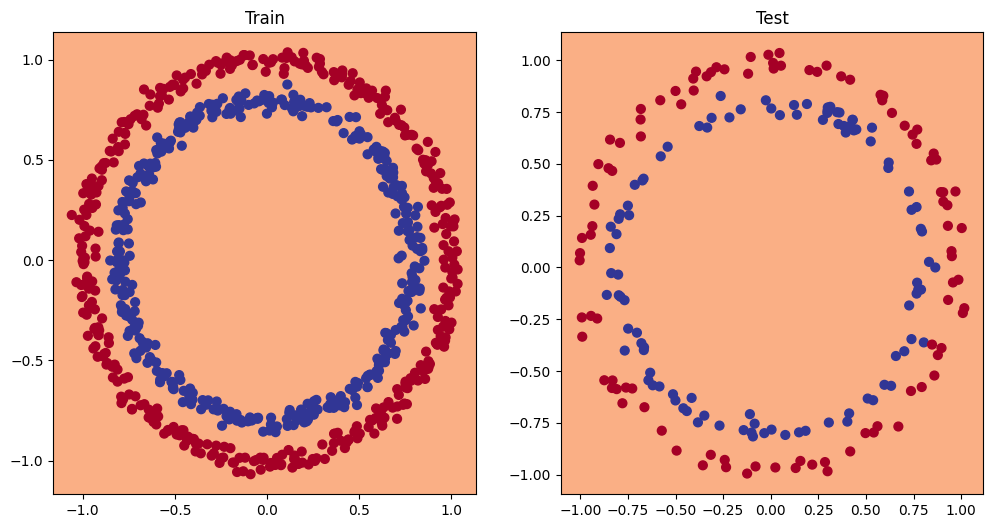

In [106]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

# 6. The missing piece: non-linearity

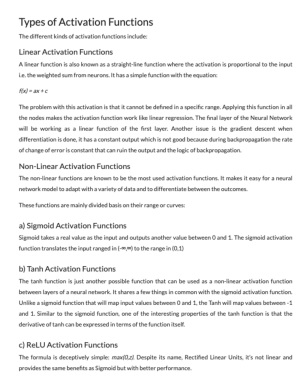

In [107]:
import matplotlib.pyplot as plt 
import matplotlib.image as img 
  
# reading the image 
testImage = img.imread('/Users/sirasittanrattanawong/Downloads/Fundamental_AI_Tutorial/AI_Tutorial_Fundamental/basic_ML_and_Deeplearning/Basic_Knowledge/image/linear_vs_non-linear_function.png') 

plt.axis('off')  # command for hiding the axis. 

# displaying the image 
plt.imshow(testImage) 

First, let's recreate the data to start off fresh. We'll use the same setup as before.

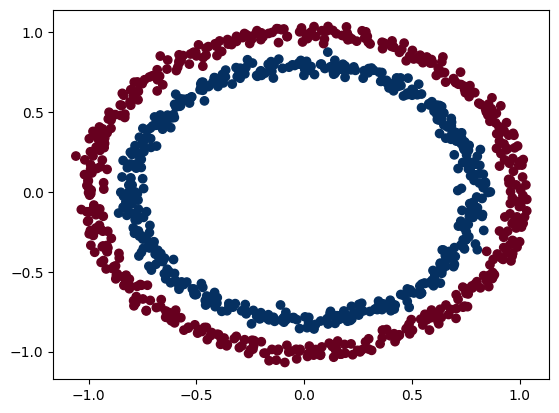

In [108]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [109]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

# 6.2 Building a model with non-linearity

What do you think will happen when we introduce the capability for our model to use non-linear actviation functions?

Well let's see.

PyTorch has a bunch of ready-made non-linear activation functions that do similiar but different things.

One of the most common and best performing is [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) (rectified linear-unit, torch.nn.ReLU()).

Rather than talk about it, let's put it in our neural network between the hidden layers in the forward pass and see what happens.

In [110]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()
        
        #method of using these attributes are in forward not layer1 -> 2 -> 3 -> relu but it is layer1 -> relu -> layer2 -> relu ->layer3

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [111]:
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

# 6.3 Training a model with non-linearity

In [112]:
# Fit the model
torch.manual_seed(42)
epochs = 2000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.5f}")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69319, Test acc: 50.00000


Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test loss: 0.69102, Test acc: 52.50000
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test loss: 0.68940, Test acc: 55.00000
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test loss: 0.68723, Test acc: 56.00000
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test loss: 0.68411, Test acc: 56.50000
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test loss: 0.67941, Test acc: 56.50000
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test loss: 0.67285, Test acc: 56.00000
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test loss: 0.66322, Test acc: 59.00000
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test loss: 0.64757, Test acc: 67.50000
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test loss: 0.62145, Test acc: 79.00000
Epoch: 1000 | Loss: 0.56818, Accuracy: 87.75% | Test loss: 0.57378, Test acc: 86.50000
Epoch: 1100 | Loss: 0.48153, Accuracy: 93.50% | Test loss: 0.49935, Test acc: 90.50000
Epoch: 1200 | Loss: 0.37056, Accuracy: 97.75% | Test

# 6.4 Evaluating a model trained with non-linear activation functions

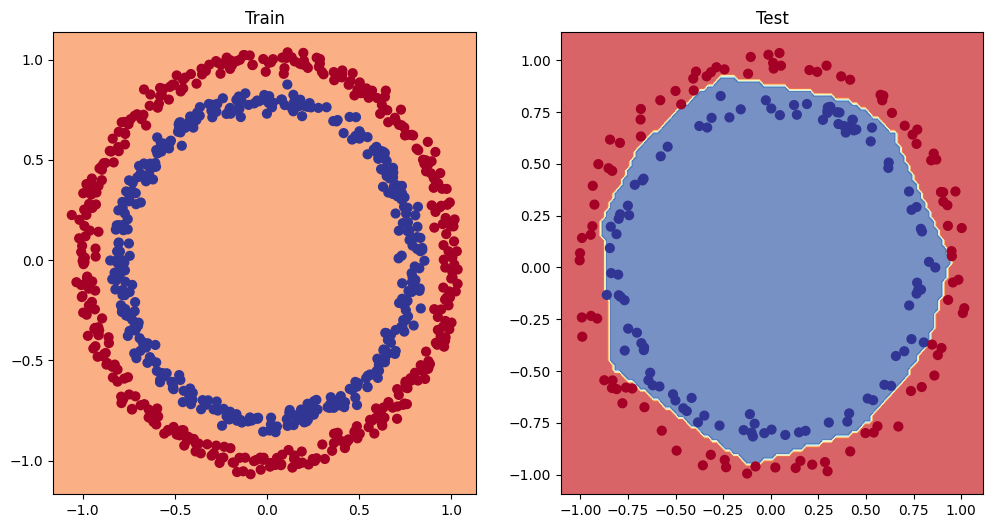

In [113]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

# 8. Putting things together

## 8.1 create multi-class classification data

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


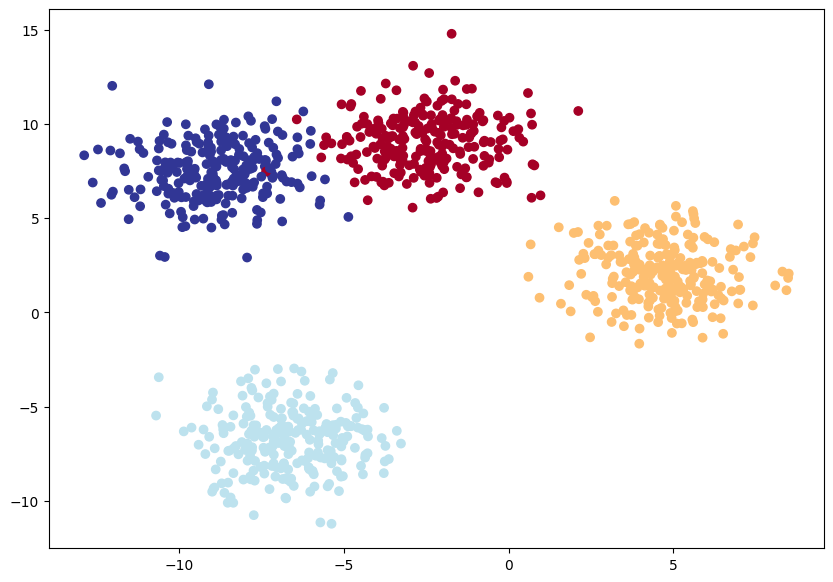

In [114]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

## 8.2 Building a multi-class classification model in PyTorch

In [115]:
device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.has_mps else 'cpu')
device

device(type='mps')

In [116]:
from torch import nn
class BlobModel(nn.Module) :
    def __init__(self, input_features, output_features, hidden_units = 8) :
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )
        
    def forward(self, x) :
        return self.linear_layer_stack(x) 
    

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=8).to(device)
model_4
        

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

## 8.3 reate loss function and optimizer

In [117]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), 
                            lr=0.01)

## 8.4 Getting prediction probabilities for a multi-class PyTorch model

In [118]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_4(X_blob_train.to(device))[:5]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], device='mps:0',
       grad_fn=<SliceBackward0>)

4 classes

In [119]:
print(model_4(X_blob_train.to(device)).shape)
print(model_4(X_blob_train.to(device))[0].shape)

torch.Size([800, 4])
torch.Size([4])


using softmax

In [120]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1) 
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='mps:0',
       grad_fn=<SliceBackward0>)
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='mps:0',
       grad_fn=<SliceBackward0>)


In [121]:
#print(y_pred_probs)
print(y_pred_probs[0])
print(print(y_pred_probs[0].shape))
print(torch.argmax(y_pred_probs[0]))
print(torch.argmax(y_pred_probs[0]).shape)
print(type(torch.argmax(y_pred_probs[0])))



tensor([0.1872, 0.2918, 0.1495, 0.3715], device='mps:0',
       grad_fn=<SelectBackward0>)
torch.Size([4])
None
tensor(3, device='mps:0')
torch.Size([])
<class 'torch.Tensor'>


In [122]:
#print(y_pred_probs)
print(y_pred_probs)
print(print(y_pred_probs.shape))
print(torch.argmax(y_pred_probs))
print(torch.argmax(y_pred_probs).shape)
print(type(torch.argmax(y_pred_probs)))

tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951],
        [0.2788, 0.0088, 0.2893, 0.4232],
        [0.3246, 0.1261, 0.4545, 0.0948],
        [0.2229, 0.0443, 0.1867, 0.5461],
        [0.3447, 0.0368, 0.5269, 0.0917],
        [0.2145, 0.0510, 0.1752, 0.5593],
        [0.2387, 0.0384, 0.2089, 0.5140],
        [0.1700, 0.3350, 0.1317, 0.3634],
        [0.1987, 0.0519, 0.1561, 0.5933],
        [0.2039, 0.0381, 0.1639, 0.5940],
        [0.1916, 0.0363, 0.1497, 0.6224],
        [0.2758, 0.0198, 0.2725, 0.4319],
        [0.2838, 0.0137, 0.2919, 0.4105],
        [0.3371, 0.0711, 0.4241, 0.1677],
        [0.2623, 0.0105, 0.2578, 0.4695],
        [0.3031, 0.0150, 0.3292, 0.3527],
        [0.2624, 0.0162, 0.2526, 0.4688],
        [0.2452, 0.0555, 0.2158, 0.4834],
        [0.2604, 0.2040, 0.2508, 0.2848],
        [0.3284, 0.1151, 0.4347, 0

## 8.5 fix for mac gpu

In [123]:
max_value = max(y_pred_probs[0].cpu().detach().numpy())
max_index = (y_pred_probs[0] == max_value).nonzero()[0]
print(max_index)
print(type(max_index))
print(max_index.shape)


tensor([3], device='mps:0')
<class 'torch.Tensor'>
torch.Size([1])


try fix in model

In [124]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Find max value and index along dimension 1
max_values, max_indices = torch.max(y_pred_probs, dim=1)

print(max_indices)
print(type(max_indices))
print(max_indices.shape)


tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3], device='mps:0')
<class 'torch.Tensor'>
torch.Size([200])


due to error using cpu instead

In [125]:
'''device2 = torch.device('cpu')
device2
device = device2'''

"device2 = torch.device('cpu')\ndevice2\ndevice = device2"

In [126]:
device

device(type='mps')

#read at replace line5 with line1-4 and #read at replace line4 with line1-3 below

you can use command+F

In [127]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits 
    
    
    
    
    
    #replace line5 with line1-4
    y_pred_probs = torch.softmax(y_logits, dim=1)
    # Find max value and index along dimension 1
    max_values, max_indices = torch.max(y_pred_probs, dim=1)
    y_pred = max_indices
    #y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    
    
    
    
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      
      
      
      #read at replace line4 with line1-3 
      test_pred_probs = torch.softmax(test_logits, dim=1)
      max_values_test, max_indices_test = torch.max(test_pred_probs, dim=1)
      test_pred = max_indices_test
      #test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      
      
      
      
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")
        #print(y_pred_probs)
        



Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test Loss: 0.96335, Test Acc: 71.00%
Epoch: 10 | Loss: 0.63688, Acc: 79.50% | Test Loss: 0.61222, Test Acc: 88.00%
Epoch: 20 | Loss: 0.46945, Acc: 97.75% | Test Loss: 0.45865, Test Acc: 98.00%
Epoch: 30 | Loss: 0.37339, Acc: 98.50% | Test Loss: 0.36771, Test Acc: 99.00%
Epoch: 40 | Loss: 0.31009, Acc: 98.62% | Test Loss: 0.30659, Test Acc: 99.00%
Epoch: 50 | Loss: 0.26486, Acc: 98.88% | Test Loss: 0.26227, Test Acc: 99.00%
Epoch: 60 | Loss: 0.23082, Acc: 98.88% | Test Loss: 0.22852, Test Acc: 99.50%


Epoch: 70 | Loss: 0.20429, Acc: 99.12% | Test Loss: 0.20197, Test Acc: 99.50%
Epoch: 80 | Loss: 0.18307, Acc: 99.12% | Test Loss: 0.18057, Test Acc: 99.00%
Epoch: 90 | Loss: 0.16578, Acc: 99.12% | Test Loss: 0.16301, Test Acc: 99.00%


## 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [128]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[ 0.6728,  2.8048, -5.8948, -3.6846],
        [ 3.1247, -4.3091,  1.2266,  4.8820],
        [-0.3193, -3.6616,  8.5252,  4.9316],
        [ 0.1084,  2.1751, -3.3363, -2.7251],
        [ 2.6332,  0.2090, -5.9259, -0.8331],
        [ 3.6064, -5.2834,  1.8419,  6.0177],
        [-0.7624, -2.6307,  7.7098,  3.7128],
        [ 2.6994, -0.9662, -3.9135,  0.6692],
        [ 0.2015, -5.3148, 10.3011,  6.9350],
        [ 2.6329, -0.5243, -4.5675,  0.1151]], device='mps:0')

read at #use line 1-3 instaed of 4

In [129]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)




#use line 1-3 instaed of 4

# Turn prediction probabilities into prediction labels
max_values, max_indices = torch.max(y_pred_probs, dim=1)
y_preds = max_indices
#y_preds = y_pred_probs.argmax(dim=1)





# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='mps:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='mps:0')
Test accuracy: 99.0%


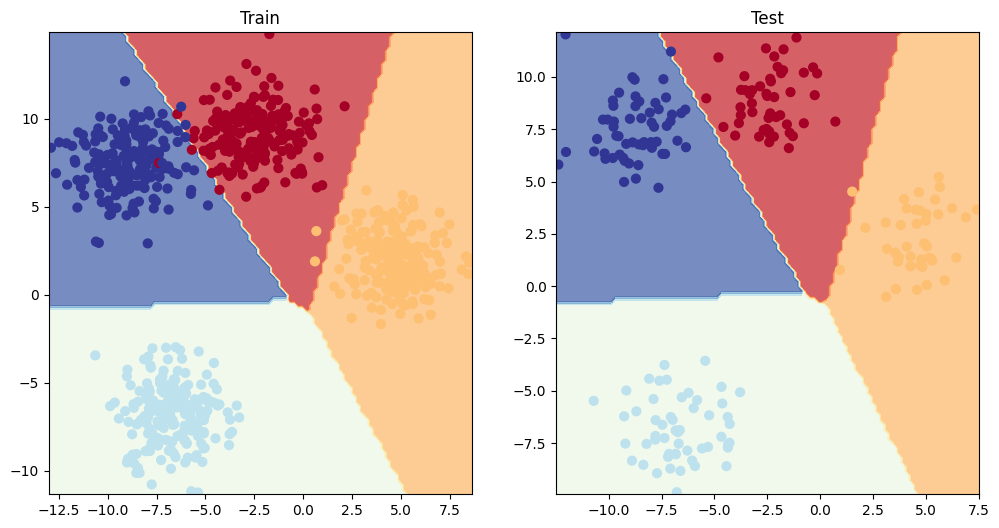

In [130]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

# 9. More classification evaluation metrics

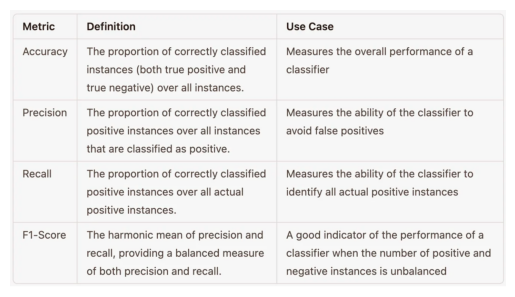

In [131]:
import os
import cv2
import matplotlib.pyplot as plt

# Relative path to the image directory
# './' refers to the current directory
image_dir = os.path.join('.', 'image')

# Construct the path to the image using os.path.join
image_path = os.path.join(image_dir, 'metric.png')

# Reading an image in default mode
image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is None:
    raise ValueError("Failed to load the image. The file may be corrupted or in an unsupported format.")

plt.axis('off')  # Command for hiding the axis
plt.imshow(image)
plt.show()





In [132]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3 # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9900, device='mps:0')